In [106]:
import pandas as pd

In [107]:
url = 'https://datosabiertos.enacom.gob.ar/rest/datastreams/288813/data.csv'
df_ingr_tel_mov = pd.read_csv(url,thousands='.', encoding='UTF-8', sep=',')

In [108]:
df_ingr_tel_mov.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013


In [109]:
df_ingr_tel_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    39 non-null     int64 
 1   Trimestre              39 non-null     int64 
 2   Ingresos (miles de $)  39 non-null     object
 3   Periodo                39 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [110]:
# Eliminar el signo "$" de los valores en la columna "Ingresos (miles de $)"
df_ingr_tel_mov['Ingresos (miles de $)'] = df_ingr_tel_mov['Ingresos (miles de $)'].str.replace('$', '', regex=False)
# Convertir los valores en la columna "Ingresos (miles de $)" a enteros
df_ingr_tel_mov['Ingresos (miles de $)'] = df_ingr_tel_mov['Ingresos (miles de $)'].str.replace('.', '', regex=False).astype('Int64')
df_ingr_tel_mov.head(5)

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


In [111]:
df_ingr_tel_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    39 non-null     int64 
 1   Trimestre              39 non-null     int64 
 2   Ingresos (miles de $)  39 non-null     Int64 
 3   Periodo                39 non-null     object
dtypes: Int64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [112]:
df_ingr_tel_mov.isnull().sum()

Año                      0
Trimestre                0
Ingresos (miles de $)    0
Periodo                  0
dtype: int64

In [113]:
df_ingr_tel_mov.drop_duplicates().head()

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


In [114]:
df_ingr_tel_mov.describe(include='all')

,Año,Trimestre,Ingresos (miles de $),Periodo
count,39.000000,39.000000,39.0,39
unique,NaN,NaN,<NA>,38
top,NaN,NaN,<NA>,Ene-Mar 2013
freq,NaN,NaN,<NA>,2
mean,2017.384615,2.461538,53108114.974359,NaN
std,2.852657,1.120295,41903566.704946,NaN
min,2013.000000,1.000000,13135235.0,NaN
25%,2015.000000,1.500000,20898785.0,NaN
50%,2017.000000,2.000000,38110028.0,NaN
75%,2020.000000,3.000000,72808045.5,NaN


In [115]:
df_ingr_tel_mov.rename(columns={'Año': 'anio'}, inplace=True)
df_ingr_tel_mov.rename(columns={'Trimestre': 'trimestre'}, inplace=True)
df_ingr_tel_mov.rename(columns={'Ingresos (miles de $)': 'ingresos (miles de pesos)'}, inplace=True)
df_ingr_tel_mov.rename(columns={'Periodo': 'periodo'}, inplace=True)

In [116]:
df_ingr_tel_mov['anio_tri'] = df_ingr_tel_mov['anio'].astype(str) + df_ingr_tel_mov['trimestre'].astype(str)

In [117]:
# Situar la columna 'anio_tri' como la primera columna
df_ingr_tel_mov = df_ingr_tel_mov[['anio_tri'] + df_ingr_tel_mov.columns[:-1].tolist()]

In [118]:
import seaborn as sns

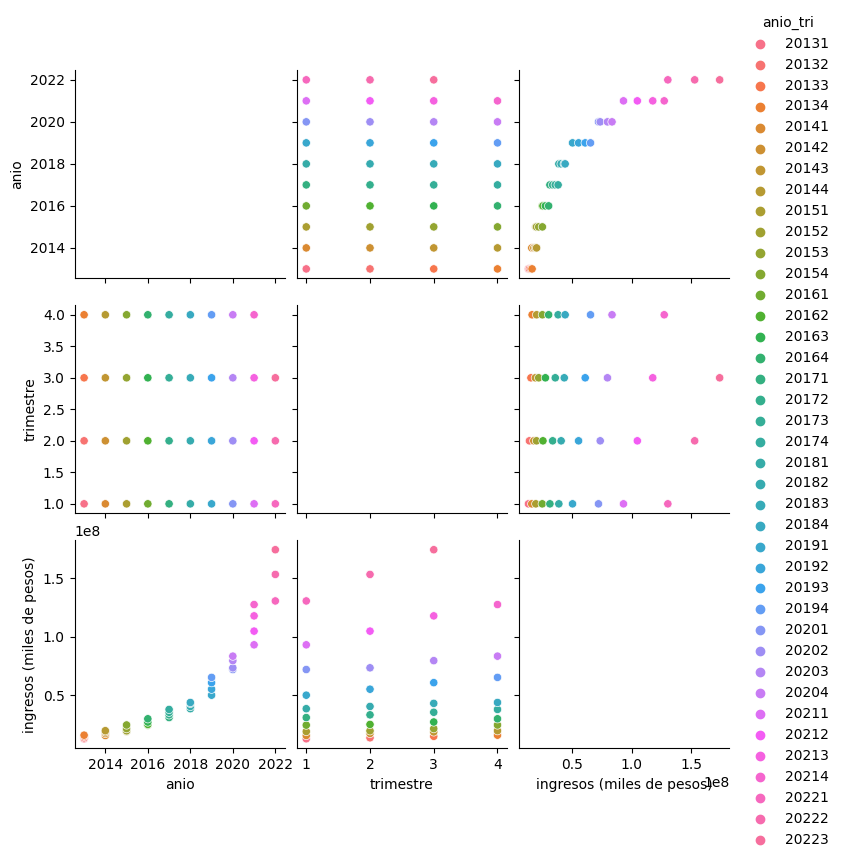

In [119]:
sns.pairplot(df_ingr_tel_mov,hue='anio_tri')

In [120]:
df_ingr_tel_mov = df_ingr_tel_mov.sort_values(by=['anio_tri'])

In [121]:
# Calcular la variación porcentual
df_ingr_tel_mov['variacion trimestral ingresos (miles de pesos)'] = df_ingr_tel_mov['ingresos (miles de pesos)'].pct_change()

# Reordenar las columnas para que la nueva columna quede junto a "trimestre" y "ingresos (miles de pesos)"
df_ingr_tel_mov = df_ingr_tel_mov[['anio_tri', 'anio', 'trimestre', 'variacion trimestral ingresos (miles de pesos)', 'ingresos (miles de pesos)', 'periodo']]

In [122]:
df_ingr_tel_mov.describe()

,anio,trimestre,variacion trimestral ingresos (miles de pesos),ingresos (miles de pesos)
count,39.000000,39.000000,38.0,39.0
mean,2017.384615,2.461538,0.071362,53108114.974359
std,2.852657,1.120295,0.046629,41903566.704946
min,2013.000000,1.000000,-0.033729,13135235.0
25%,2015.000000,1.500000,0.038501,20898785.0
50%,2017.000000,2.000000,0.073426,38110028.0
75%,2020.000000,3.000000,0.101157,72808045.5
max,2022.000000,4.000000,0.173069,174057836.0


In [123]:
# Reemplazar los valores nulos con 0
df_ingr_tel_mov.fillna(0, inplace=True)

# Convertir la columna "anio_tri" a int64
df_ingr_tel_mov['anio_tri'] = df_ingr_tel_mov['anio_tri'].astype('int64')

In [124]:
df_ingr_tel_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   anio_tri                                        39 non-null     int64  
 1   anio                                            39 non-null     int64  
 2   trimestre                                       39 non-null     int64  
 3   variacion trimestral ingresos (miles de pesos)  39 non-null     Float64
 4   ingresos (miles de pesos)                       39 non-null     Int64  
 5   periodo                                         39 non-null     object 
dtypes: Float64(1), Int64(1), int64(3), object(1)
memory usage: 2.2+ KB


In [125]:
df_ingr_tel_mov.head()

,anio_tri,anio,trimestre,variacion trimestral ingresos (miles de pesos),ingresos (miles de pesos),periodo
0,20131,2013,1,0.0,13135235,Ene-Mar 2013
1,20132,2013,2,0.063613,13970806,Abr-Jun 2013
2,20133,2013,3,0.090535,15235659,Jul-Sept 2013
3,20134,2013,4,0.064532,16218846,Oct-Dic 2013
4,20141,2014,1,-0.017294,15938353,Ene-Mar 2013


In [126]:
# Guardar DataFrame como archivo CSV
df_ingr_tel_mov.to_csv('../CSV_Cleaned/df_ingr_tel_mov_con_var.csv',mode='w', index=False)